<a href="https://colab.research.google.com/github/PatiyalAbhishek/Yulu_HypothesisTesting/blob/main/Yulu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#               YULU BUSINESS CASE
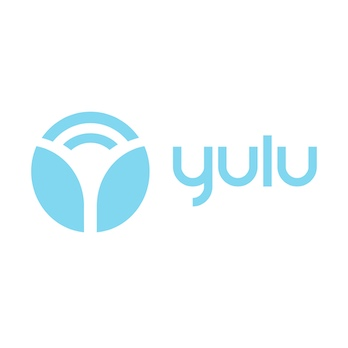

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import binom, ttest_ind,kstest, f_oneway,pearsonr,spearmanr, shapiro, chi2_contingency
import scipy.stats as stats
import math
from statsmodels.graphics.gofplots import qqplot


**# Problem Statement:**
Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

In [ ]:
df=pd.read_csv("/content/YULU.csv")

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

*   data has no null values


****************************************************

In [ ]:
df.shape

(10886, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.describe(include="all")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [ ]:
columns= ["season", "holiday","workingday","weather"]
df[columns]= df[columns].astype("object")
df["datetime"]=pd.to_datetime(df["datetime"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


Converting numerical data to categorical data

*********************************************************

# Univariate visual analysis



Visual anaylsis of continous data

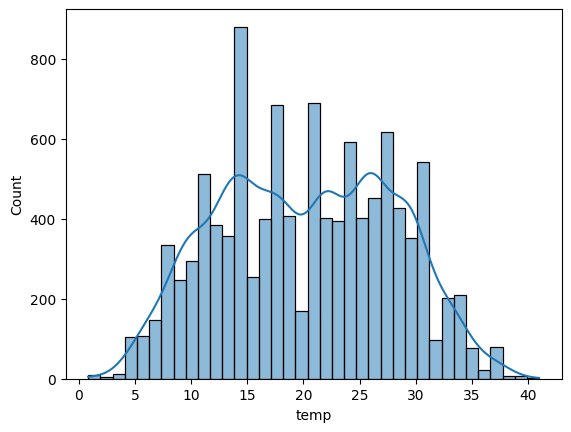

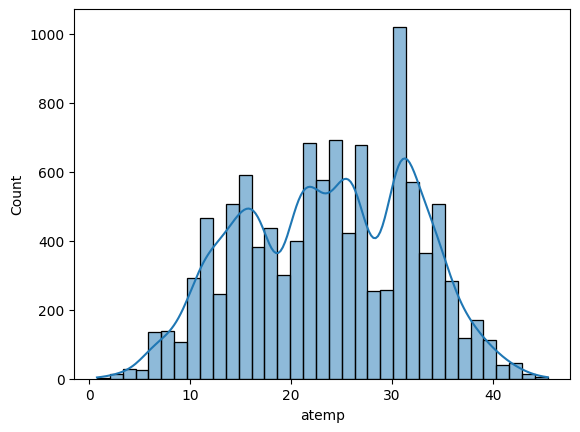

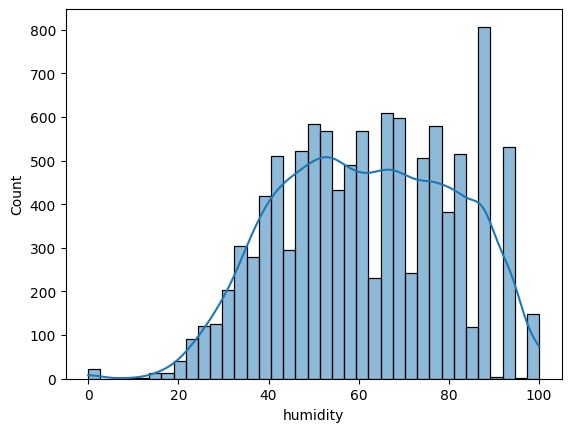

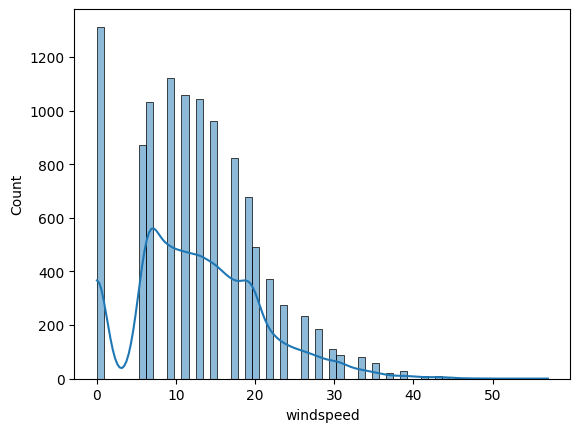

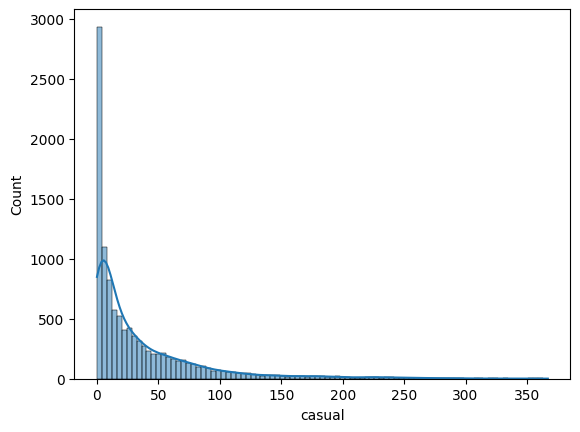

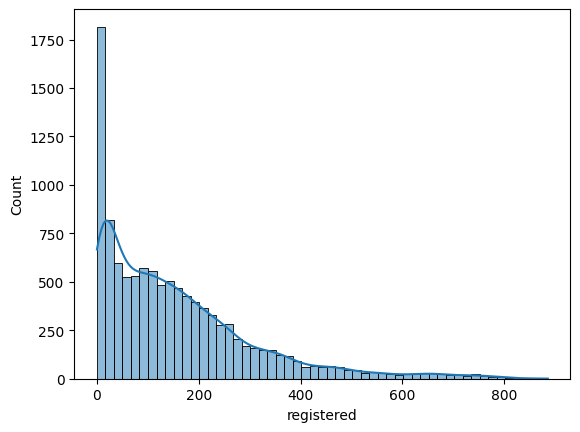

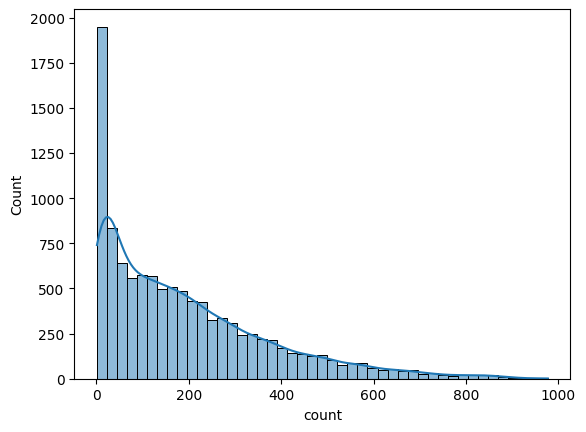

In [ ]:
for i in df.columns:
  if df[i].dtype==int or df[i].dtype==float   :
    sns.histplot(data= df, x=df[i], kde=True)
    plt.show()


* From above plots we can say that temp, atemp and humidity follows normal distribution
* registered, casual and count follows log normal distribution

# outlier detection

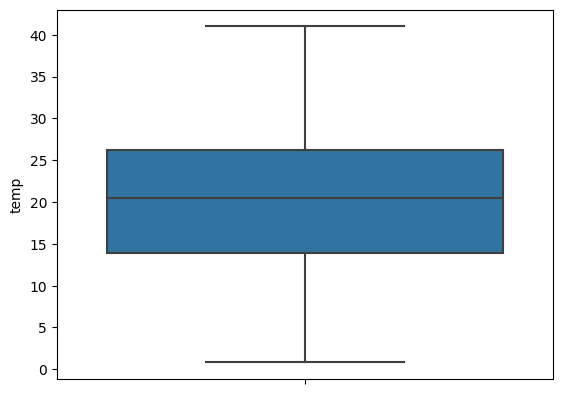

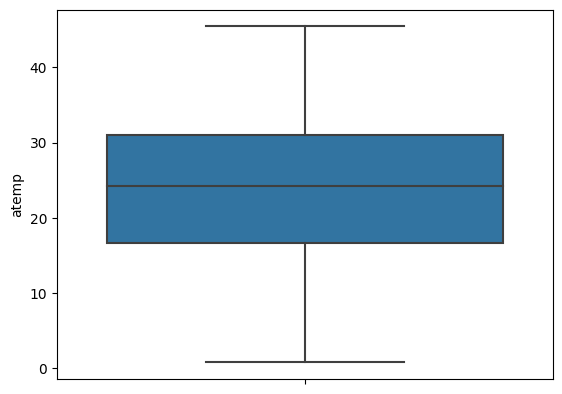

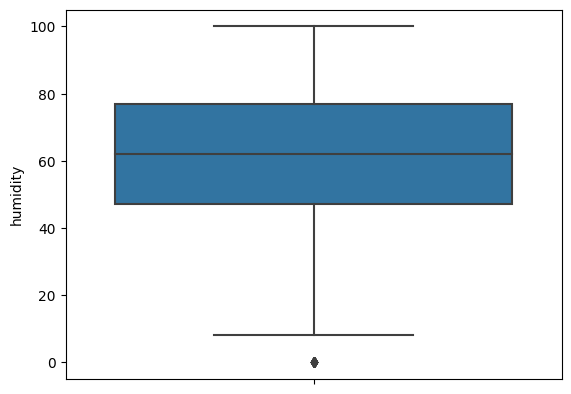

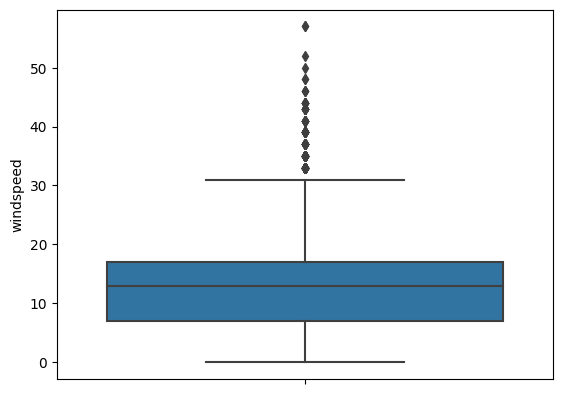

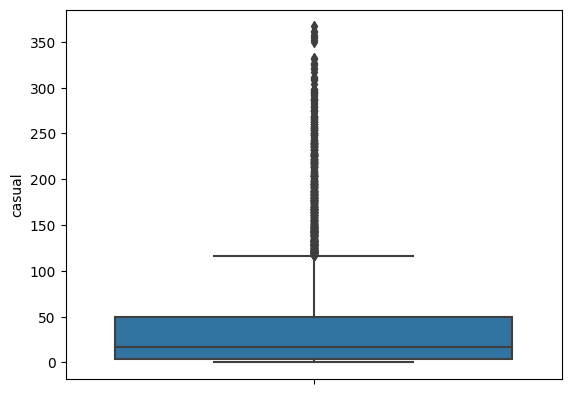

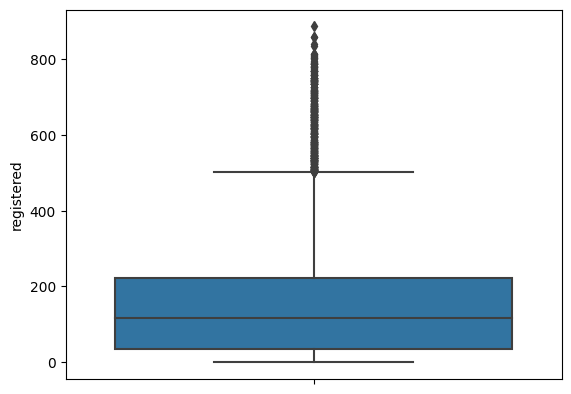

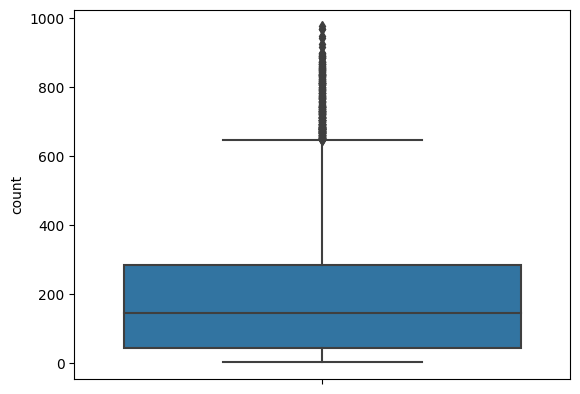

In [ ]:
for i in df.columns:
  if df[i].dtype==int or df[i].dtype==float   :
    sns.boxplot(y=df[i])
    plt.show()

* humidity, casual, registered, count, windspeed has outliers

# Visual analysis of categorical varaibles

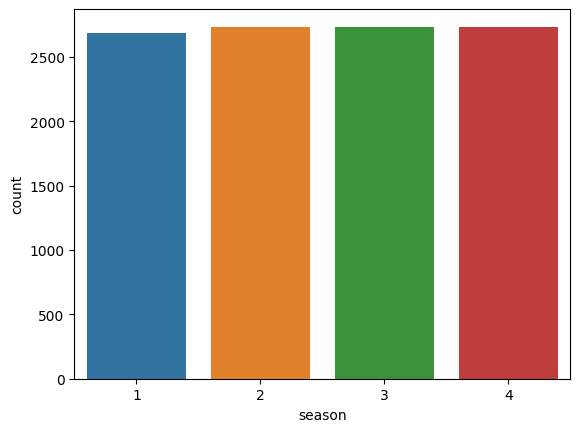

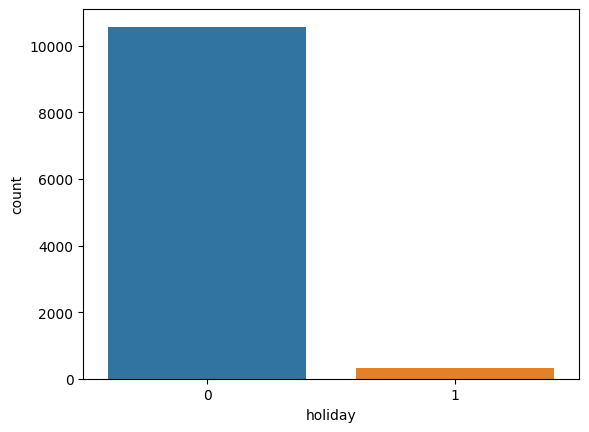

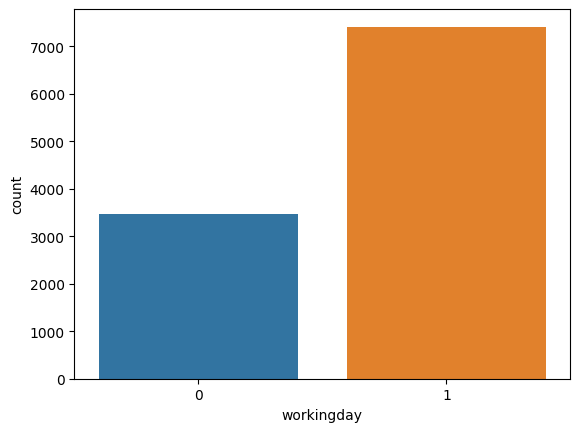

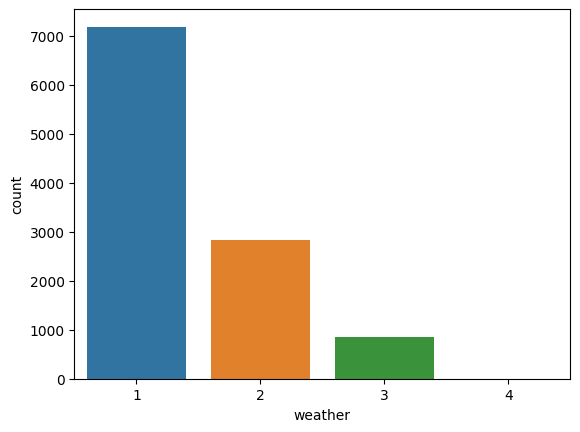

In [ ]:
for i in df.columns:
  if df[i].dtype==object  :
    sns.countplot(data=df, x=df[i])
    plt.show()

* data resembles real world data as it has more working days than holidays, equal number of days in all seasons and most of the days are clear

# Bivariate analysis

Count VS categorical variables using boxplot

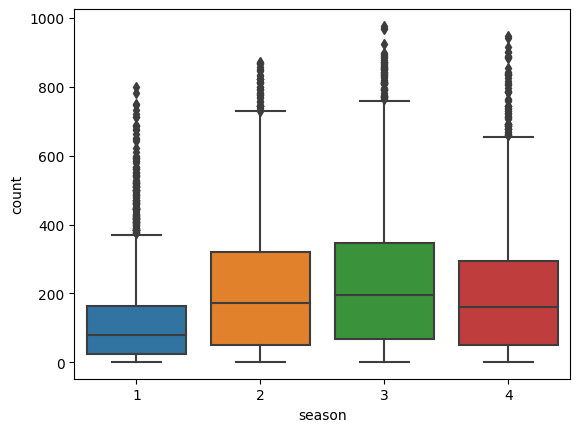

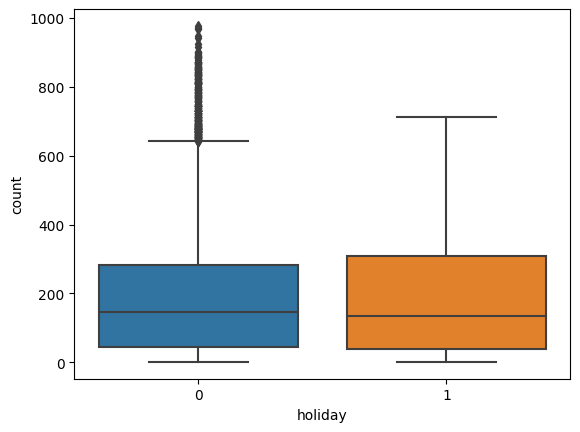

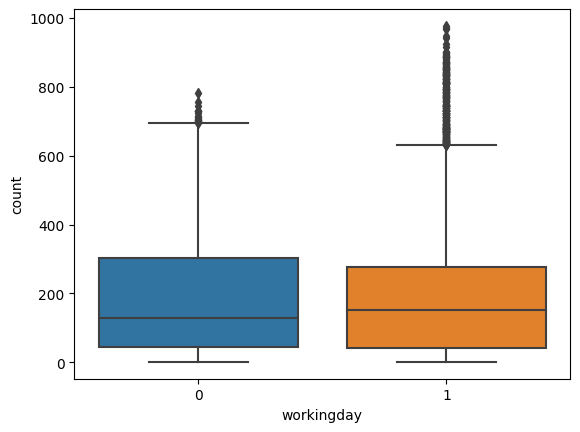

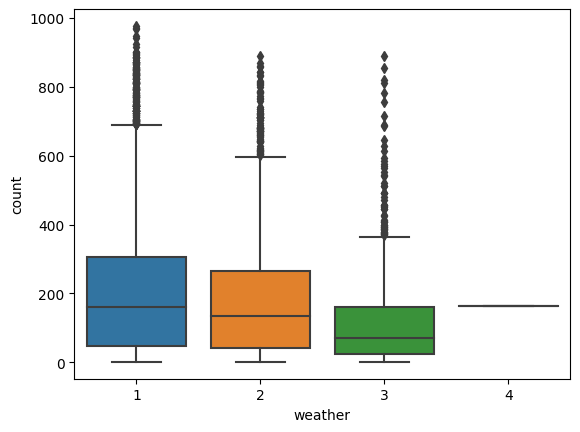

In [ ]:
for j in df.columns:
  if df[j].dtype==object:
    sns.boxplot(x=df[j],y=df["count"])
    plt.show()

* More number of bikes are booked in fall followed by summer, winter and least bikes are booked in spring
* More number of bikes are booked on holidays
* More number of bikes are booked on clear weather days and least are booked on heavy rainfall days

# Correlation between numerical variables

In [ ]:
df.corr()

<ipython-input-35-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


<ipython-input-36-0a3cd13aeaf5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm")


<Axes: >

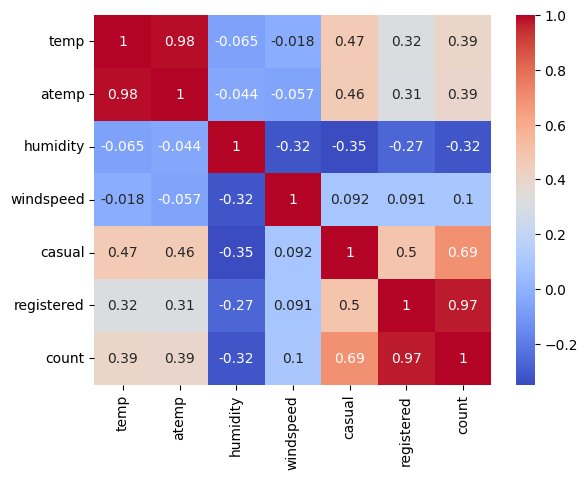

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

# **Try establishing a relation between the dependent and independent variable (Dependent “Count” & Independent: Workingday, Weather, Season etc)**

# Count VS Workingday

In [ ]:
df.groupby("workingday").mean()

<ipython-input-37-d3490184e13c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("workingday").mean()


,temp,atemp,humidity,windspeed,casual,registered,count
workingday,,,,,,,
0,19.889839,23.349837,62.192286,12.639916,59.308290,129.198330,188.506621
1,20.390696,23.798153,61.743119,12.874143,25.107663,167.904209,193.011873


<Axes: xlabel='count', ylabel='Density'>

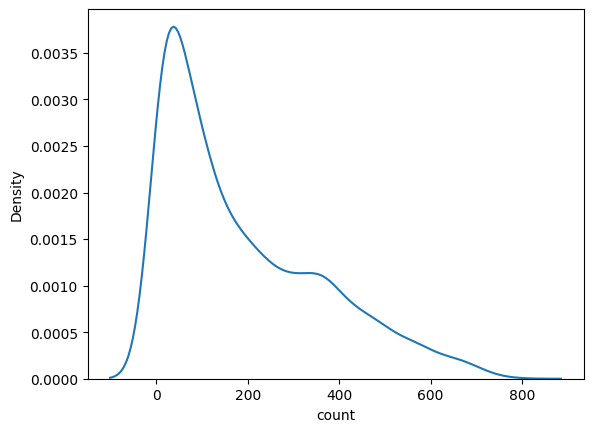

In [ ]:
a=df.loc[df["workingday"]==0]["count"]
sns.kdeplot(a)

<Axes: xlabel='count', ylabel='Density'>

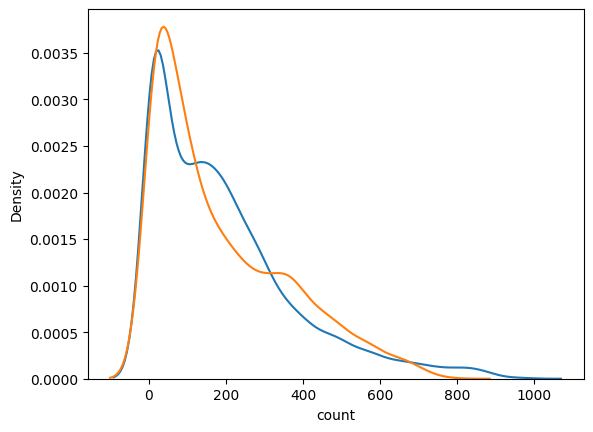

In [ ]:
b=df.loc[df["workingday"]==1]["count"]
sns.kdeplot(b)
sns.kdeplot(a)

In [ ]:
kstest(a,b)

KstestResult(statistic=0.05570196737090361, pvalue=8.003959300341833e-07, statistic_location=125, statistic_sign=1)

The number of bikes booked on a workingday and non working day are not normal distribution as per KS-test

In [ ]:
Ho="Number of bikes booked does not depend on workingay or not"
Ha="Number of bikes booked depend on workingay or not"

t_stat,p_value=ttest_ind(a,b,alternative="two-sided")
print("t_stat : ",t_stat)
print("p_value : ",p_value)
alpha= 0.05
if p_value < alpha :
 print("Reject Ho")
else :
 print("Fail to Reject Ho")


t_stat :  -1.2096277376026694
p_value :  0.22644804226361348
Fail to Reject Ho


* data of number of bikes booked on working and non workingday are not a normal distribution as per KS test.
* However if we perform ttest to check whether they are dependent or independent we can see that number of bikes booked  does not depend on workingday or non working day

# Count VS Weather

In [ ]:
df.groupby("weather").sum()

<ipython-input-42-05a0e0d3221c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("weather").sum()


,temp,atemp,humidity,windspeed,casual,registered,count
weather,,,,,,,
1,147846.82,172565.755,407907,92723.1626,289900,1186163,1476063
2,55587.80,65387.220,195831,34517.8506,87246,419914,507160
3,16790.32,19544.905,69872,12087.2020,14983,87106,102089
4,8.20,11.365,86,6.0032,6,158,164


In [ ]:
df_weather1=df.loc[df["weather"]==1]["count"]
df_weather2=df.loc[df["weather"]==2]["count"]
df_weather3=df.loc[df["weather"]==3]["count"]
df_weather4=df.loc[df["weather"]==4]["count"]

In [ ]:
Ho= "Number of bikes booked does not depend on weather"
Ha= "Number of bikes booked depends on weather"
f_stat,p_value=f_oneway(df_weather1,df_weather2,df_weather3,df_weather4)
print("f_stat : ",f_stat)
print("p_value : ",p_value)
alpha = 0.05
if p_value< alpha:
 print("Interpretation : Reject Ho")
 print(f"Conclusion : {Ha}")
else:
 print("Interpretation : Fail to Reject Ho")

f_stat :  65.53024112793271
p_value :  5.482069475935669e-42
Interpretation : Reject Ho
Conclusion : Number of bikes booked depends on weather


* Clearly after performing ANOVA test on COUNT and Weather we can see that number of bikes booked depend on weather

# Count VS Season

<Axes: xlabel='season', ylabel='count'>

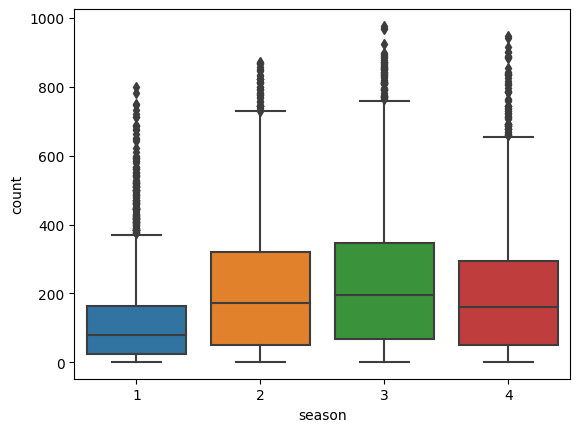

In [ ]:
sns.boxplot(x="season", y="count", data=df)

In [ ]:
df_season1=df.loc[df["season"]==1]["count"]
df_season2=df.loc[df["season"]==2]["count"]
df_season3=df.loc[df["season"]==3]["count"]
df_season4=df.loc[df["season"]==4]["count"]

In [ ]:
Ho= "Number of bikes booked does not depend on season"
Ha= "Number of bikes booked depends on season"
f_stat,p_value=f_oneway(df_season1,df_season2,df_season3,df_season4)
print("f_stat : ",f_stat)
print("p_value : ",p_value)
alpha = 0.05
if p_value< alpha:
 print("Interpretation : Reject Ho")
 print(f"Conclusion : {Ha}")
else:
 print("Interpretation : Fail to Reject Ho")

f_stat :  236.94671081032106
p_value :  6.164843386499654e-149
Interpretation : Reject Ho
Conclusion : Number of bikes booked depends on season


* Clearly after performing ANOVA test on COUNT and Season we can see that number of bikes booked depend on season

# Count VS Holiday

In [ ]:
df_holiday= df[df["holiday"]==1]["count"]
df_noholiday= df[df["holiday"]==0]["count"]

In [ ]:
kstest(df_holiday, df_noholiday)

KstestResult(statistic=0.048058805196384724, pvalue=0.4735777551913273, statistic_location=352, statistic_sign=-1)

In [ ]:
Ho="Number of bikes booked does not depend on holidays"
Ha="Number of bikes booked depend on holiday"

t_stat,p_value=ttest_ind(df_holiday,df_noholiday,alternative="two-sided")
print("t_stat : ",t_stat)
print("p_value : ",p_value)
alpha= 0.05
if p_value < alpha :
 print("Reject Ho")
 print(f"Conclusion : {Ha}")
else :
 print("Fail to Reject Ho")
 print(f"Conclusion : {Ho}")


t_stat :  -0.5626388963477119
p_value :  0.5736923883271103
Fail to Reject Ho
Conclusion : Number of bikes booked does not depend on holiday or not


* Number of bikes booked does not depend on holiday

# Temperature VS Count

In [ ]:
df["temp"].max()

41.0

In [ ]:
df["temp"].min()

0.82

In [ ]:
bins= [df["temp"].min(),10,20,30,df["temp"].max()]
labels= ["t_min_to_10","t_10_to_20", "t_20_to_30", "t_30_to_41"]
df["temp_bins"]= pd.cut(df["temp"],bins=bins,labels=labels)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,temp_bins
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,t_min_to_10
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,t_min_to_10
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,t_min_to_10
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,t_min_to_10
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,t_min_to_10


<Axes: xlabel='temp_bins', ylabel='count'>

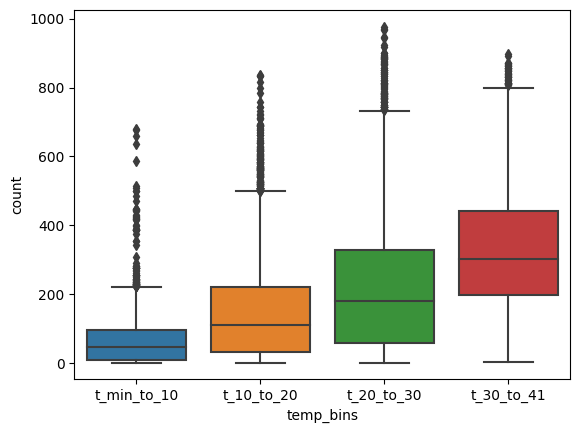

In [ ]:
sns.boxplot(x="temp_bins", y="count", data=df)

In [ ]:
df_t_min_to_10= df[df["temp_bins"]=="t_min_to_10"]["count"]
df_t_10_to_20= df[df["temp_bins"]=="t_10_to_20"]["count"]
df_t_20_to_30= df[df["temp_bins"]=="t_20_to_30"]["count"]
df_t_30_to_41= df[df["temp_bins"]=="t_30_to_41"]["count"]

In [ ]:
Ho= "Number of bikes booked does not depend on temperature"
Ha= "Number of bikes booked depends on temperature"
f_stat,p_value=f_oneway(df_t_min_to_10,df_t_10_to_20,df_t_20_to_30,df_t_30_to_41)
print("f_stat : ",f_stat)
print("p_value : ",p_value)
alpha = 0.05
if p_value< alpha:
 print("Interpretation : Reject Ho")
 print(f"Conclusion : {Ha}")
else:
 print("Interpretation : Fail to Reject Ho")
 print(f"Conclusion : {Ho}")

f_stat :  647.7741989440545
p_value :  0.0
Interpretation : Reject Ho
Conclusion : Number of bikes booked depends on temperature


* Number of bikes booked depends on temperature
* less number of bikes are booked when temperature is below 10
*More number of bikes are booked when temperature is in between 20 to 30

# Temp VS atemp correlation

test to check whether data is normally distributed

Wilkin-Shapiro test


In [ ]:
shapiro(df["temp"])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9804227352142334, pvalue=4.577117001754969e-36)

In [ ]:
shapiro(df["atemp"])

ShapiroResult(statistic=0.9815532565116882, pvalue=3.35599504562436e-35)

Q-Q Plot

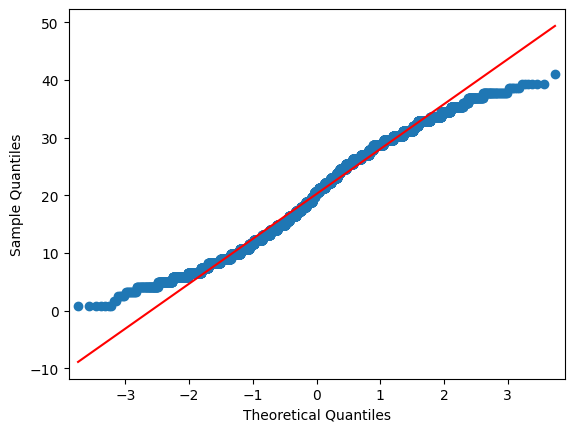

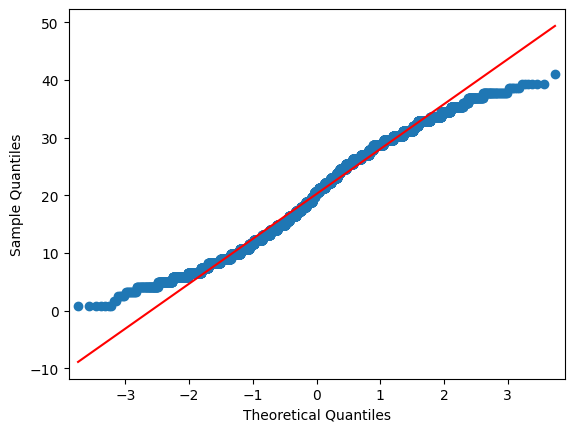

In [ ]:
qqplot(df["temp"], line="s")

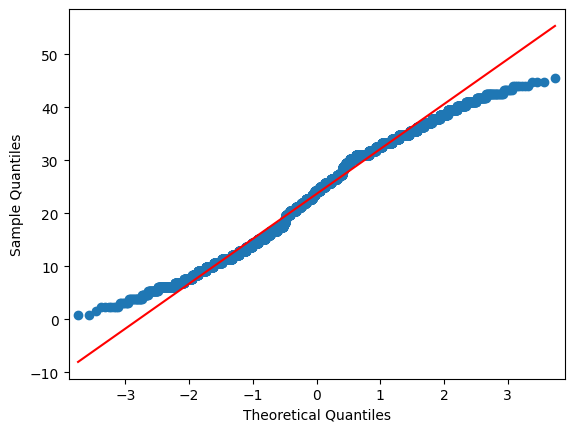

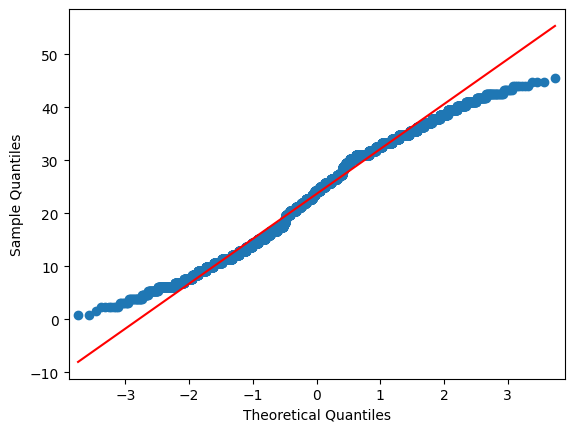

In [ ]:
qqplot(df["atemp"], line="s")

scatte plot to check linearity of data

<Axes: xlabel='temp', ylabel='atemp'>

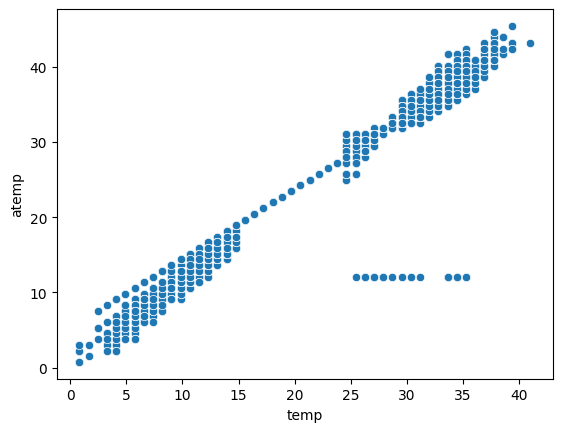

In [ ]:
sns.scatterplot(x=df["temp"], y=df["atemp"])

In [ ]:
Ho= "temp and atemp are not related"
Ha= "temp and atemp are related"
corr_coeff,p_value=spearmanr(df["temp"],df["atemp"])
print("corr_coeff : ",corr_coeff)
print("p_value : ",p_value)
alpha = 0.05
if p_value< alpha:
 print("Interpretation : Reject Ho")
 print(f"Conclusion : {Ha}")
else:
 print("Interpretation : Fail to Reject Ho")


corr_coeff :  0.9871284684480133
p_value :  0.0
Interpretation : Reject Ho
Conclusion : temp and atemp are related


* Temp and atemp are positively correlated

# Season VS Weather

In [ ]:
df_season_weather= pd.crosstab(columns=df["season"], index=df["weather"])
df_season_weather

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [ ]:
# Ho : Season Doesn't affect weather( Independant)
# Ha :  Season affects weather( Dependant)
chi_stat,p_value,dof,expected=chi2_contingency(df_season_weather)
print("chi_stat : ",chi_stat)
print("p_value : ",p_value)
alpha = 0.05
if p_value< alpha:
 print("Interpretation : Reject Ho")
 print("Conclusion : Season affects weather( Dependant)")
else:
 print("Interpretation : Fail to Reject Ho")


chi_stat :  49.15865559689363
p_value :  1.5499250736864862e-07
Interpretation : Reject Ho
Conclusion : Season affects weather( Dependant)


* Season and Weather are dependent

# Count VS Datetime

In [ ]:
df_0_to_8= df.loc[(df["datetime"].dt.time >=pd.to_datetime("00:00:00").time()) & (df["datetime"].dt.time <= pd.to_datetime("07:59:59").time() )]["count"]
df_8_to_16= df.loc[(df["datetime"].dt.time >=pd.to_datetime("08:00:00").time()) & (df["datetime"].dt.time <= pd.to_datetime("15:59:59").time() )]["count"]
df_16_to_24= df.loc[(df["datetime"].dt.time >pd.to_datetime("16:00:00").time()) & (df["datetime"].dt.time <= pd.to_datetime("23:59:59").time() )]["count"]

print(f"No. of bikes booked between 00:00 to 08:00 are {df_0_to_8.sum()}")
print(f"No. of bikes booked between 08:00 to 16:00 are {df_8_to_16.sum()}")
print(f"No. of bikes booked between 16:00 to 23:59 are {df_16_to_24.sum()}")

No. of bikes booked between 00:00 to 08:00 are 199243
No. of bikes booked between 08:00 to 16:00 are 902983
No. of bikes booked between 16:00 to 23:59 are 838984


In [ ]:
Ho= "Number of bikes booked does not depend on time"
Ha= "Number of bikes booked depends on time"
f_stat,p_value=f_oneway(df_16_to_24,df_8_to_16,df_0_to_8)
print("f_stat : ",f_stat)
print("p_value : ",p_value)
alpha = 0.05
if p_value< alpha:
 print("Interpretation : Reject Ho")
 print(f"Conclusion : {Ha}")
else:
 print("Interpretation : Fail to Reject Ho")
 print(f"Conclusion : {Ho}")

f_stat :  1992.1392781061618
p_value :  0.0
Interpretation : Reject Ho
Conclusion : Number of bikes booked depends on time


* Number of bikes booked depends on time
* During mid night that is from 00:00 to 08:00 less number of bikes are booked compared to the rest of the day

# **Recommendations**
* More number of bikes should be available during fall and summer to increase profits
*During heavy rainfall weather conditions,company has to concentrate on marketing strategies or has to utilize that time to keep the vehicles charged, as very low number of bikes are booked
*During clear weather conditions more number bikes should be made available
*Workigday or holiday does not impact on number of bikes booked
* More number should be available between 08:00 to 23:59 as that is the peak time for bookings

